In [4]:
cd '/Users/kaylinlee/Desktop/SoSe2020DataScience/'

/Users/kaylinlee/Desktop/SoSe2020DataScience


In [5]:
import numpy as np
import pyam
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# data_path = "/Users/Broccolee/Google Drive/Grad School/TU BERLIN/Negative Emissions & Carbon Markets/Data/"
# plot_path = "/Users/Broccolee/Google Drive/Grad School/TU BERLIN/Negative Emissions & Carbon Markets/Plots/"

data_path = "/Users/kaylinlee/Desktop/KL_ISIpedia/Thesis/Code/Data/"
plot_path = "/Users/kaylinlee/Desktop/KL_ISIpedia/Thesis/Code/Plots/"


<IPython.core.display.Javascript object>

pyam - INFO: Running in a notebook, setting `pyam` logging level to `logging.INFO` and adding stderr handler


In [6]:
# df = pyam.IamDataFrame(data='tutorial_data.csv')

In [3]:
df.models()

NameError: name 'df' is not defined

In [4]:
df.variables(include_units=True)

,variable,unit
5,AR5 climate diagnostics|Temperature|Global Mea...,°C
0,Emissions|CO2,Mt CO2/yr
1,Primary Energy,EJ/yr
2,Primary Energy|Biomass,EJ/yr
3,Primary Energy|Fossil,EJ/yr
4,Primary Energy|Non-Biomass Renewables,EJ/yr


In [46]:
df.filter(model='MESSAGE*').variables()

Series([], Name: variable, dtype: object)

In [85]:
display_df = df.filter(model='MESSAGE*', variable='Investment|Energy Supply|Electricity|Biomass|w/ CCS', region='World', year=[2010, 2030, 2050, 2100])
display_df.timeseries()

AttributeError: 'DataFrame' object has no attribute 'value'

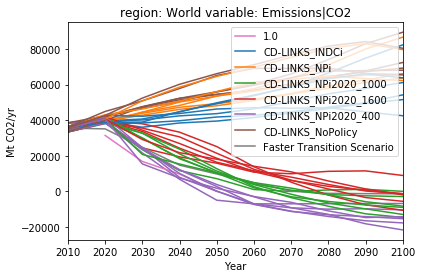

In [18]:
df.filter(variable='Emissions|CO2', region='World').line_plot(color='scenario')


## Pulling IAMC15 data from the database

In [7]:
conn=pyam.iiasa.Connection('iamc15')

pyam.iiasa - INFO: You are connected to the IXSE_SR15 scenario explorer hosted by IIASA. If you use this data in any published format, please cite the data as provided in the explorer guidelines: https://data.ene.iiasa.ac.at/iamc-1.5c-explorer/#/about


In [14]:
Test_df= conn.query(
    model=['MESSAGEix*', 'IMAGE*', 'AIM/CGE*','REMIND*','WITCH-GLOBIOM*'],
    variable = ['GDP|PPP',
                'Temperature|Global Mean',
                'Final Energy|Industry|Solids|Coal',
                'Food Demand',
                'Population|Rural',
                'Population|Urban'
               ])

Test_df.to_excel(data_path +'Test.xlsx')


In [10]:
Test_df

,model,scenario,variable,unit,region,year,value,subannual,meta
0,AIM/CGE 2.0,ADVANCE_2020_1.5C-2100,GDP|PPP,billion US$2010/yr,World,2005,60200.956860,0.0,0
1,AIM/CGE 2.0,ADVANCE_2020_1.5C-2100,GDP|PPP,billion US$2010/yr,World,2010,71262.535520,0.0,0
2,AIM/CGE 2.0,ADVANCE_2020_1.5C-2100,GDP|PPP,billion US$2010/yr,World,2015,87133.387110,0.0,0
3,AIM/CGE 2.0,ADVANCE_2020_1.5C-2100,GDP|PPP,billion US$2010/yr,World,2020,107923.794600,0.0,0
4,AIM/CGE 2.0,ADVANCE_2020_1.5C-2100,GDP|PPP,billion US$2010/yr,World,2025,127726.500000,0.0,0
...,...,...,...,...,...,...,...,...,...
54211,WITCH-GLOBIOM 4.4,CD-LINKS_NoPolicy,Food Demand,kcal/cap/day,R5REF,2060,3300.224584,0.0,0
54212,WITCH-GLOBIOM 4.4,CD-LINKS_NoPolicy,Food Demand,kcal/cap/day,R5REF,2070,3363.821451,0.0,0
54213,WITCH-GLOBIOM 4.4,CD-LINKS_NoPolicy,Food Demand,kcal/cap/day,R5REF,2080,3418.638694,0.0,0
54214,WITCH-GLOBIOM 4.4,CD-LINKS_NoPolicy,Food Demand,kcal/cap/day,R5REF,2090,3469.286235,0.0,0


In [12]:
Test_df.model.unique()

array(['AIM/CGE 2.0', 'AIM/CGE 2.1', 'IMAGE 3.0.1', 'IMAGE 3.0.2',
       'MESSAGEix-GLOBIOM 1.0', 'REMIND 1.7', 'REMIND-MAgPIE 1.5',
       'REMIND-MAgPIE 1.7-3.0', 'WITCH-GLOBIOM 3.1', 'WITCH-GLOBIOM 4.2',
       'WITCH-GLOBIOM 4.4'], dtype=object)

In [15]:
#scen_oi=['IMAGE 3.0.1', 'REMIND 1.7', 'REMIND-MAgPIE 1.7-3.0']
data=Test_df.loc[(Test_df.variable=='Temperature|Global Mean')

sns.lineplot(x='year',y='value' ,data=data, hue="region")
#plt.suptitle('All Models: BECCS Investments in billion US$2010/yr', fontsize = 14)

#plt.savefig(plot_path + 'all_models:BECCS_investments.png', bbox_inches='tight')

SyntaxError: invalid syntax (<ipython-input-15-52bbee2bd3a7>, line 4)

Text(0.5, 0.98, 'BECCS Investments in billion US$2010/yr')

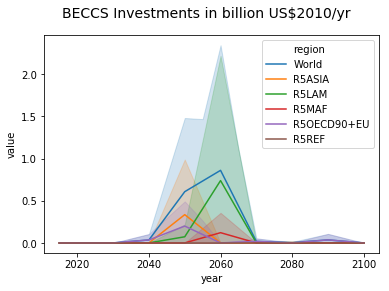

In [96]:
data=BECCSInvest_df.loc[(BECCSInvest_df.variable=='Investment|Energy Supply|Electricity|Biomass|w/ CCS')
                        &(BECCSInvest_df.model=='MESSAGEix-GLOBIOM 1.0')]

sns.lineplot(x='year',y='value' ,data=data, hue="region")
plt.suptitle('BECCS Investments in billion US$2010/yr', fontsize = 14)

#plt.savefig(plot_path + 'Least cost: BECCS over time- all scenarios.png', bbox_inches='tight')

Text(0.5, 0.98, 'BECCS Investments in billion US$2010/yr')

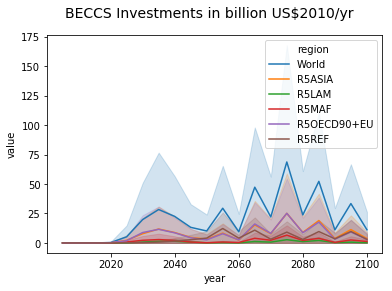

In [95]:
data=BECCSInvest_df.loc[(BECCSInvest_df.variable=='Investment|Energy Supply|Electricity|Biomass|w/ CCS')
                        &(BECCSInvest_df.model=='IMAGE 3.0.1')]

sns.lineplot(x='year',y='value' ,data=data, hue="region")
plt.suptitle('BECCS Investments in billion US$2010/yr', fontsize = 14)

#plt.savefig(plot_path + 'Least cost: BECCS over time- all scenarios.png', bbox_inches='tight')

Text(0.5, 0.98, 'BECCS Investments in billion US$2010/yr')

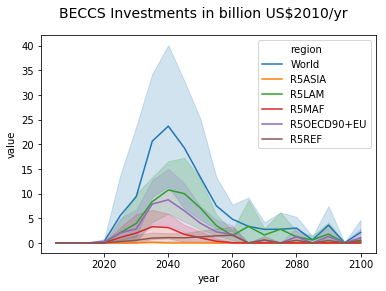

In [97]:
data=BECCSInvest_df.loc[(BECCSInvest_df.variable=='Investment|Energy Supply|Electricity|Biomass|w/ CCS')
                        &(BECCSInvest_df.model=='REMIND-MAgPIE 1.7-3.0')]

sns.lineplot(x='year',y='value' ,data=data, hue="region")
plt.suptitle('BECCS Investments in billion US$2010/yr', fontsize = 14)

#plt.savefig(plot_path + 'Least cost: BECCS over time- all scenarios.png', bbox_inches='tight')

In [6]:
BECCS_df= conn.query(
    model=['IMAGE*', 'REMIND*'],
    variable = ['Investment|Energy Supply|Electricity|Biomass|w/ CCS',
                'Capital Cost|Electricity|Biomass|w/ CCS',
               'Cumulative Capacity|Electricity|Biomass|w/ CCS'])

#BECCSInvest_df.to_excel(data_path +'IAMC15_BECCS_Investment_data.xlsx')


In [10]:
BECCS_df

,model,scenario,variable,unit,region,year,value,subannual,meta
0,IMAGE 3.0.1,CD-LINKS_INDCi,Investment|Energy Supply|Electricity|Biomass|w...,billion US$2010/yr,World,2015,0.001569,0.0,0
1,IMAGE 3.0.1,CD-LINKS_INDCi,Investment|Energy Supply|Electricity|Biomass|w...,billion US$2010/yr,World,2020,0.006275,0.0,0
2,IMAGE 3.0.1,CD-LINKS_INDCi,Investment|Energy Supply|Electricity|Biomass|w...,billion US$2010/yr,World,2025,0.900774,0.0,0
3,IMAGE 3.0.1,CD-LINKS_INDCi,Investment|Energy Supply|Electricity|Biomass|w...,billion US$2010/yr,World,2030,4.350598,0.0,0
4,IMAGE 3.0.1,CD-LINKS_INDCi,Investment|Energy Supply|Electricity|Biomass|w...,billion US$2010/yr,World,2035,7.678829,0.0,0
5,IMAGE 3.0.1,CD-LINKS_INDCi,Investment|Energy Supply|Electricity|Biomass|w...,billion US$2010/yr,World,2040,4.810363,0.0,0
6,IMAGE 3.0.1,CD-LINKS_INDCi,Investment|Energy Supply|Electricity|Biomass|w...,billion US$2010/yr,World,2045,0.859870,0.0,0
7,IMAGE 3.0.1,CD-LINKS_INDCi,Investment|Energy Supply|Electricity|Biomass|w...,billion US$2010/yr,World,2050,0.382163,0.0,0
8,IMAGE 3.0.1,CD-LINKS_INDCi,Investment|Energy Supply|Electricity|Biomass|w...,billion US$2010/yr,World,2055,0.205937,0.0,0
9,IMAGE 3.0.1,CD-LINKS_INDCi,Investment|Energy Supply|Electricity|Biomass|w...,billion US$2010/yr,World,2060,0.029710,0.0,0


Text(0.5, 0.98, 'Two Models: BECCS Investments in billion US$2010/yr')

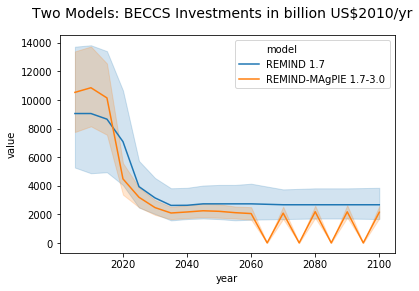

In [11]:
data=BECCS_df.loc[(BECCSInvest_df.variable=='Investment|Energy Supply|Electricity|Biomass|w/ CCS')]

sns.lineplot(x='year',y='value' ,data=data, hue="model")
plt.suptitle('Two Models: BECCS Investments in billion US$2010/yr', fontsize = 14)

#plt.savefig(plot_path + 'all_models:BECCS_investments.png', bbox_inches='tight')

In [12]:
data

,model,scenario,variable,unit,region,year,value,subannual,meta
2640,REMIND 1.7,CEMICS-1.5-CDR12,Investment|Energy Supply|Electricity|Biomass|w...,billion US$2010/yr,R5MAF,2045,0.0000,0.0,0
2641,REMIND 1.7,CEMICS-1.5-CDR12,Investment|Energy Supply|Electricity|Biomass|w...,billion US$2010/yr,R5MAF,2050,0.0000,0.0,0
2642,REMIND 1.7,CEMICS-1.5-CDR12,Investment|Energy Supply|Electricity|Biomass|w...,billion US$2010/yr,R5MAF,2055,0.0000,0.0,0
2643,REMIND 1.7,CEMICS-1.5-CDR12,Investment|Energy Supply|Electricity|Biomass|w...,billion US$2010/yr,R5MAF,2060,0.0000,0.0,0
2644,REMIND 1.7,CEMICS-1.5-CDR12,Investment|Energy Supply|Electricity|Biomass|w...,billion US$2010/yr,R5MAF,2070,0.0006,0.0,0
2645,REMIND 1.7,CEMICS-1.5-CDR12,Investment|Energy Supply|Electricity|Biomass|w...,billion US$2010/yr,R5MAF,2080,0.0001,0.0,0
2646,REMIND 1.7,CEMICS-1.5-CDR12,Investment|Energy Supply|Electricity|Biomass|w...,billion US$2010/yr,R5MAF,2090,0.0000,0.0,0
2647,REMIND 1.7,CEMICS-1.5-CDR12,Investment|Energy Supply|Electricity|Biomass|w...,billion US$2010/yr,R5MAF,2100,0.0001,0.0,0
2648,REMIND 1.7,CEMICS-1.5-CDR12,Capital Cost|Electricity|Biomass|w/ CCS,US$2010/kW,R5MAF,2005,15515.4936,0.0,0
2649,REMIND 1.7,CEMICS-1.5-CDR12,Capital Cost|Electricity|Biomass|w/ CCS,US$2010/kW,R5MAF,2010,15515.4936,0.0,0


Text(0.5, 0.98, 'Two Models: BECCS capital costs')

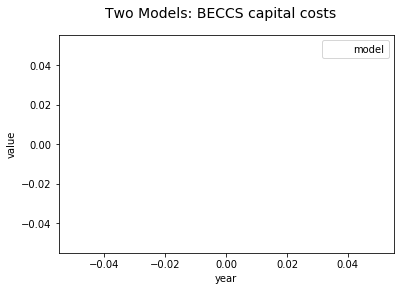

In [9]:
data=BECCS_df.loc[(BECCSInvest_df.variable=='Cumulative Capacity|Electricity|Biomass|w/ CCS')]
                        #&(BECCSInvest_df.model=='MESSAGEix-GLOBIOM 1.0')]

sns.lineplot(x='year',y='value' ,data=data, hue="model")
plt.suptitle('Two Models: BECCS capital costs', fontsize = 14)

#plt.savefig(plot_path + 'all_models:BECCS_investments.png', bbox_inches='tight')